# HW03 (due October 17th 23:59)

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [2]:
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()


# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None


import numpy as np
import os
import pandas as pd

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)


20640 8


In [5]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [6]:
y_df=pd.DataFrame(y_full, columns=data['target_names'])
y_df.head()

MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422

In [7]:
X_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
y_df.isnull().sum()

MedHouseVal    0
dtype: int64

# Summary Statistics

In [9]:
y_df.shape

(20640, 1)

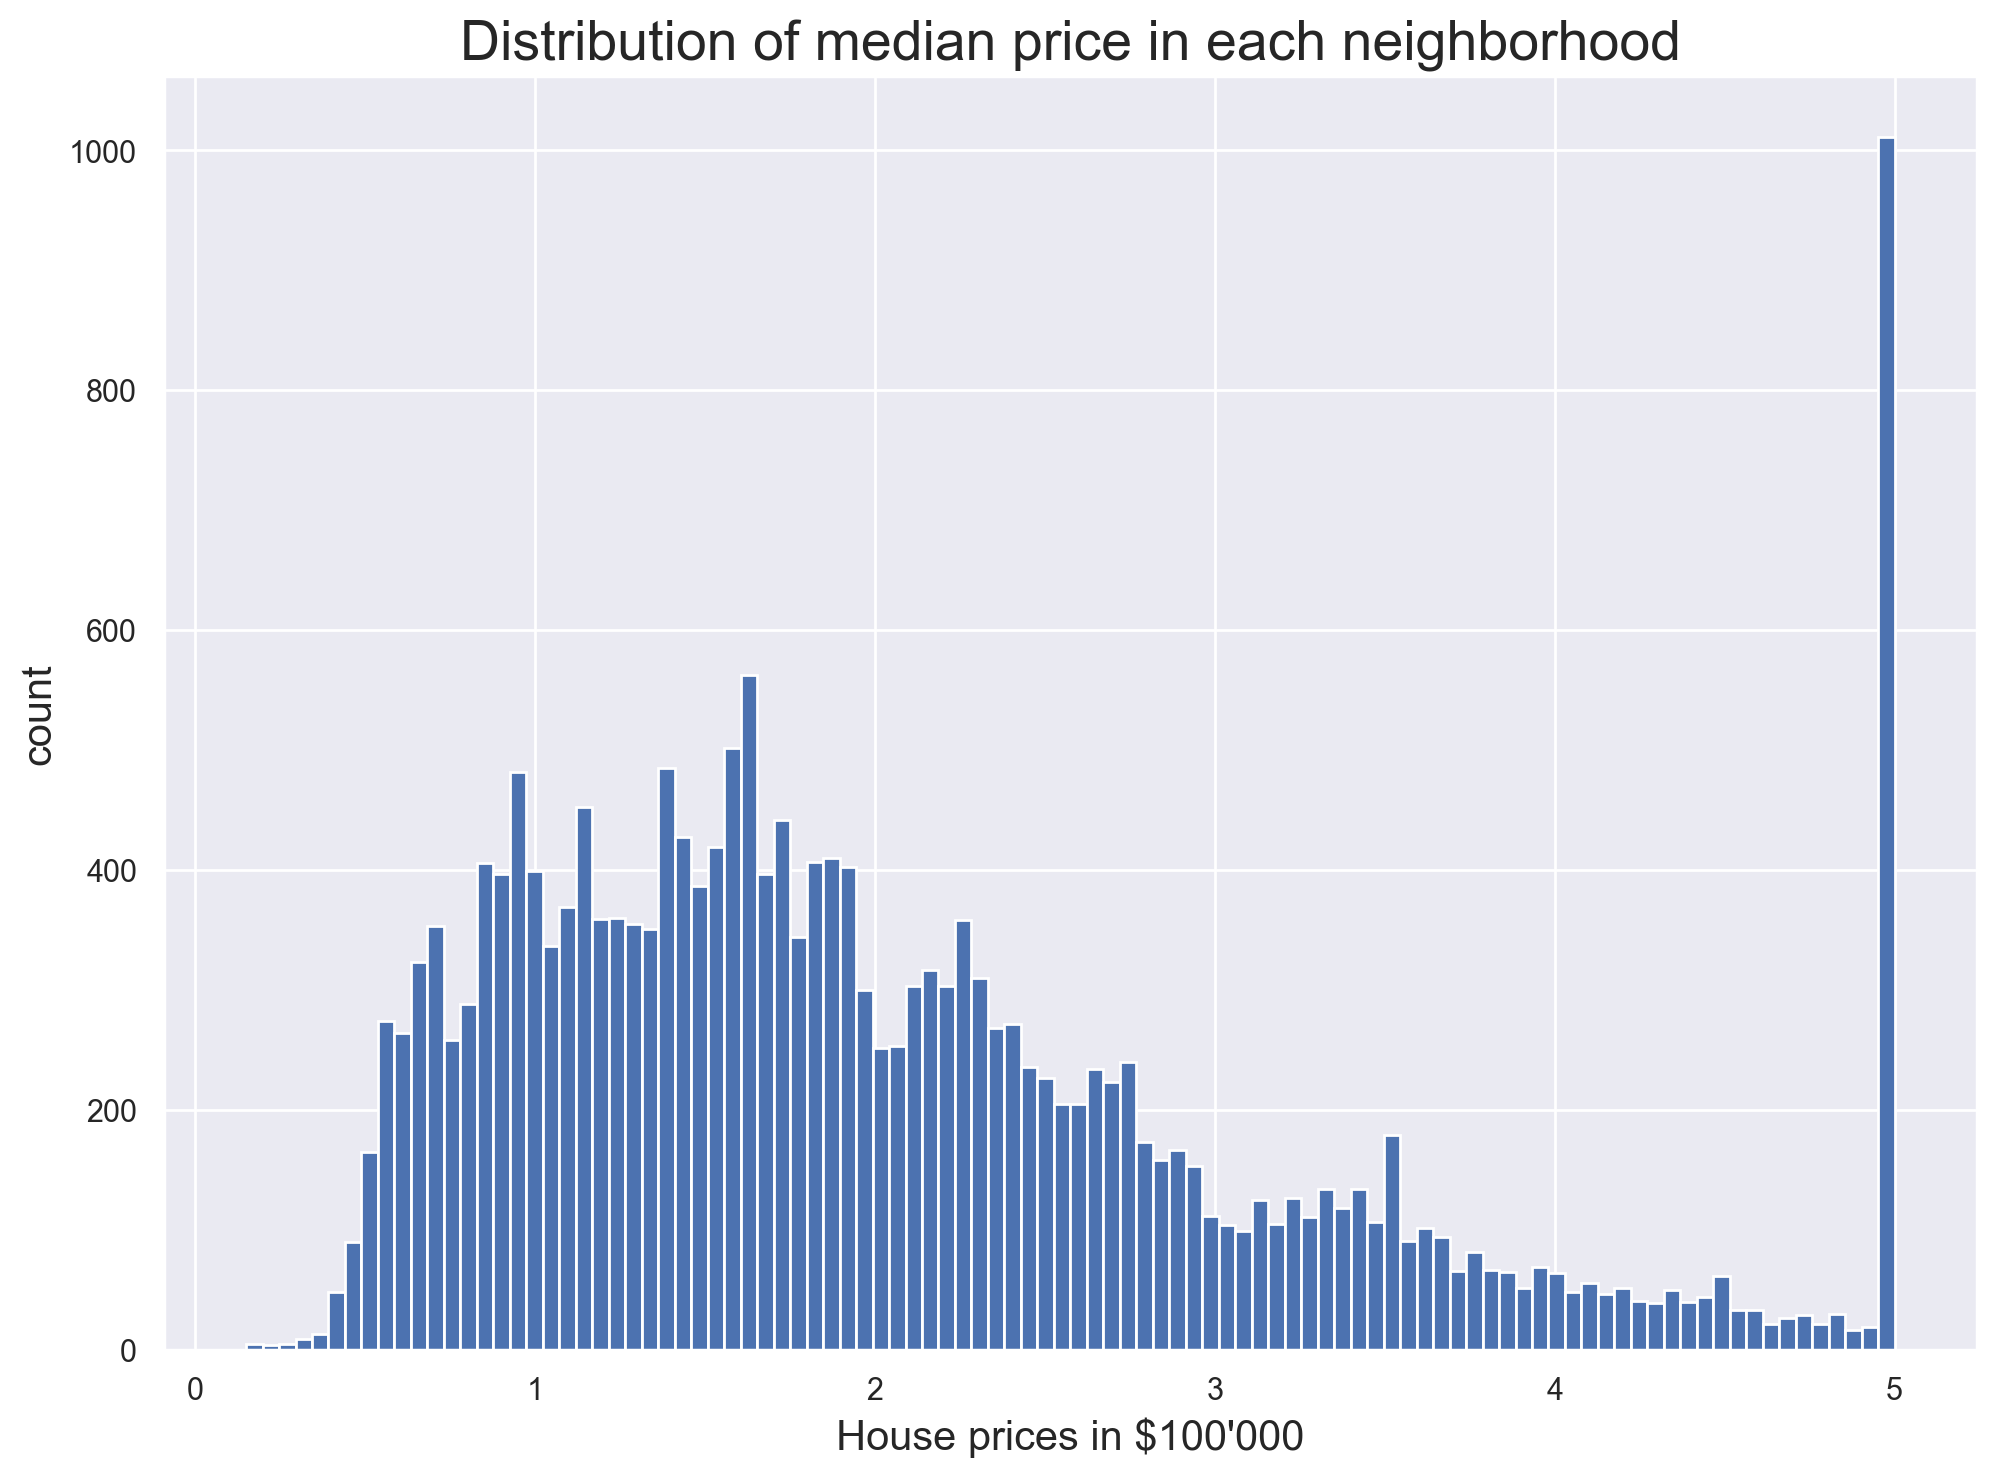

In [10]:
from seaborn import distplot
# make a histogram of the label variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_df, bins=100)
plt.xlabel("House prices in $100'000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()
#TODO

In [11]:
# make histograms of all predictors
#TODO
X_df.shape



(20640, 8)

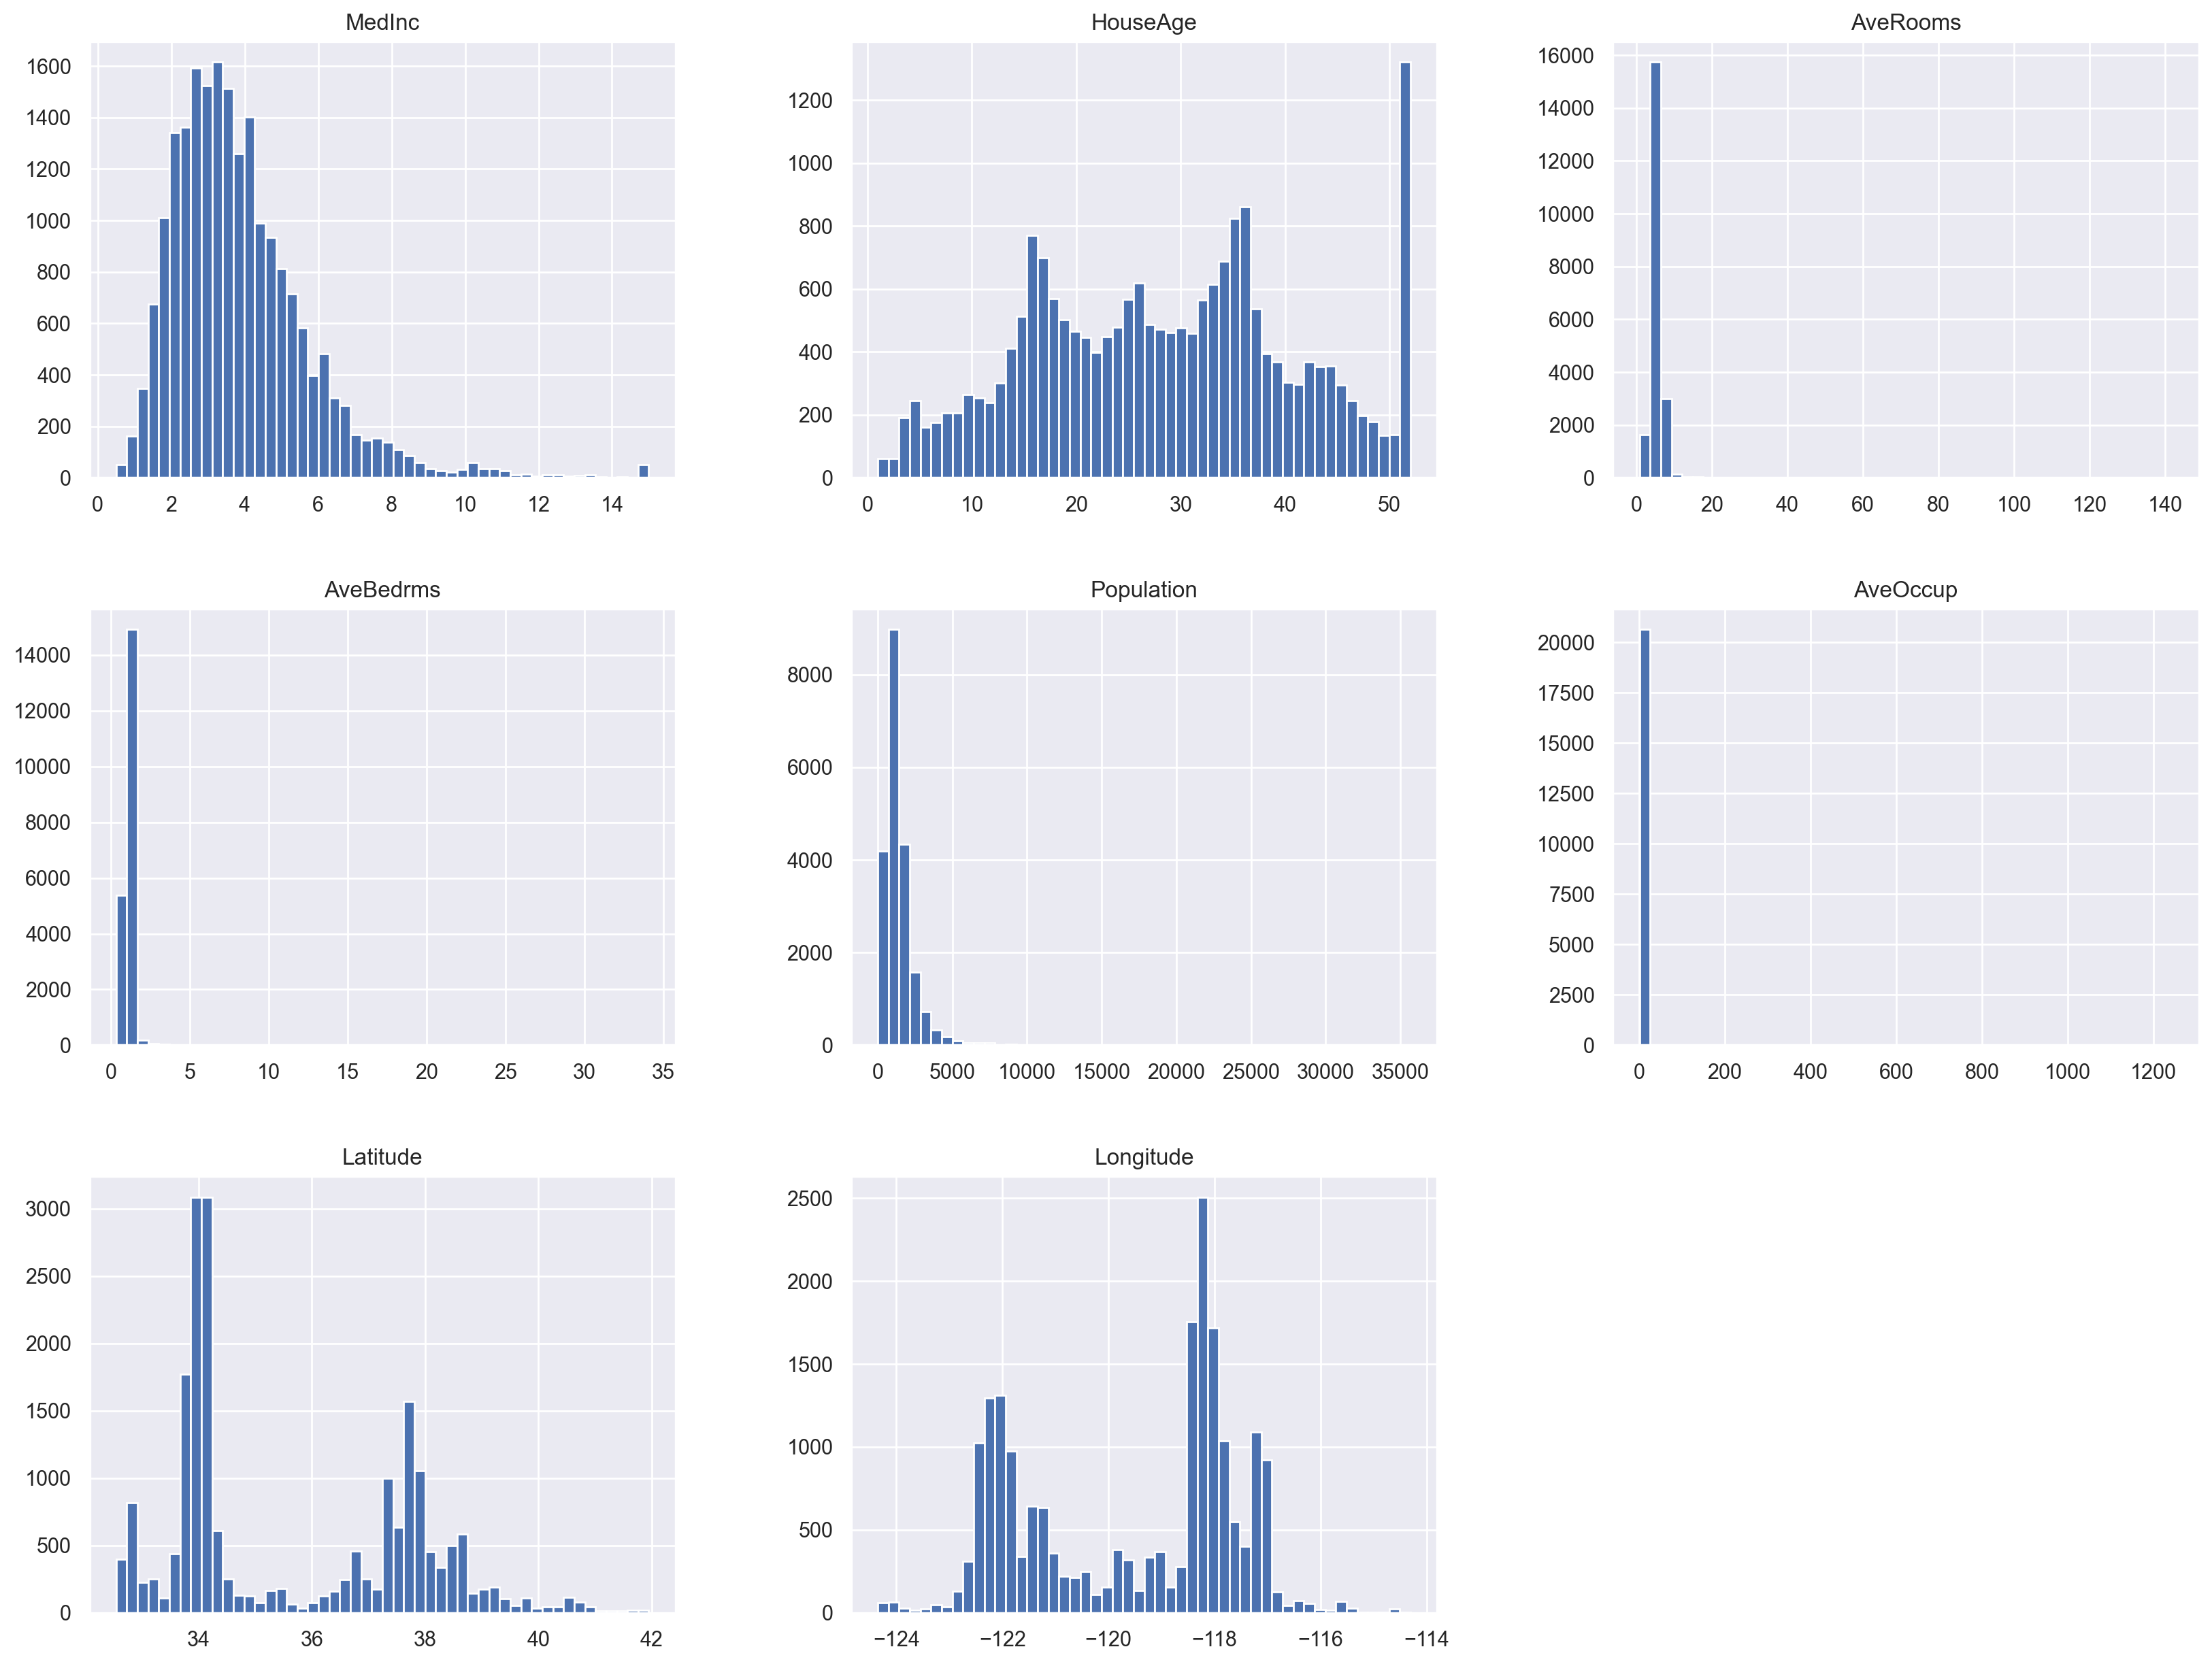

In [12]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

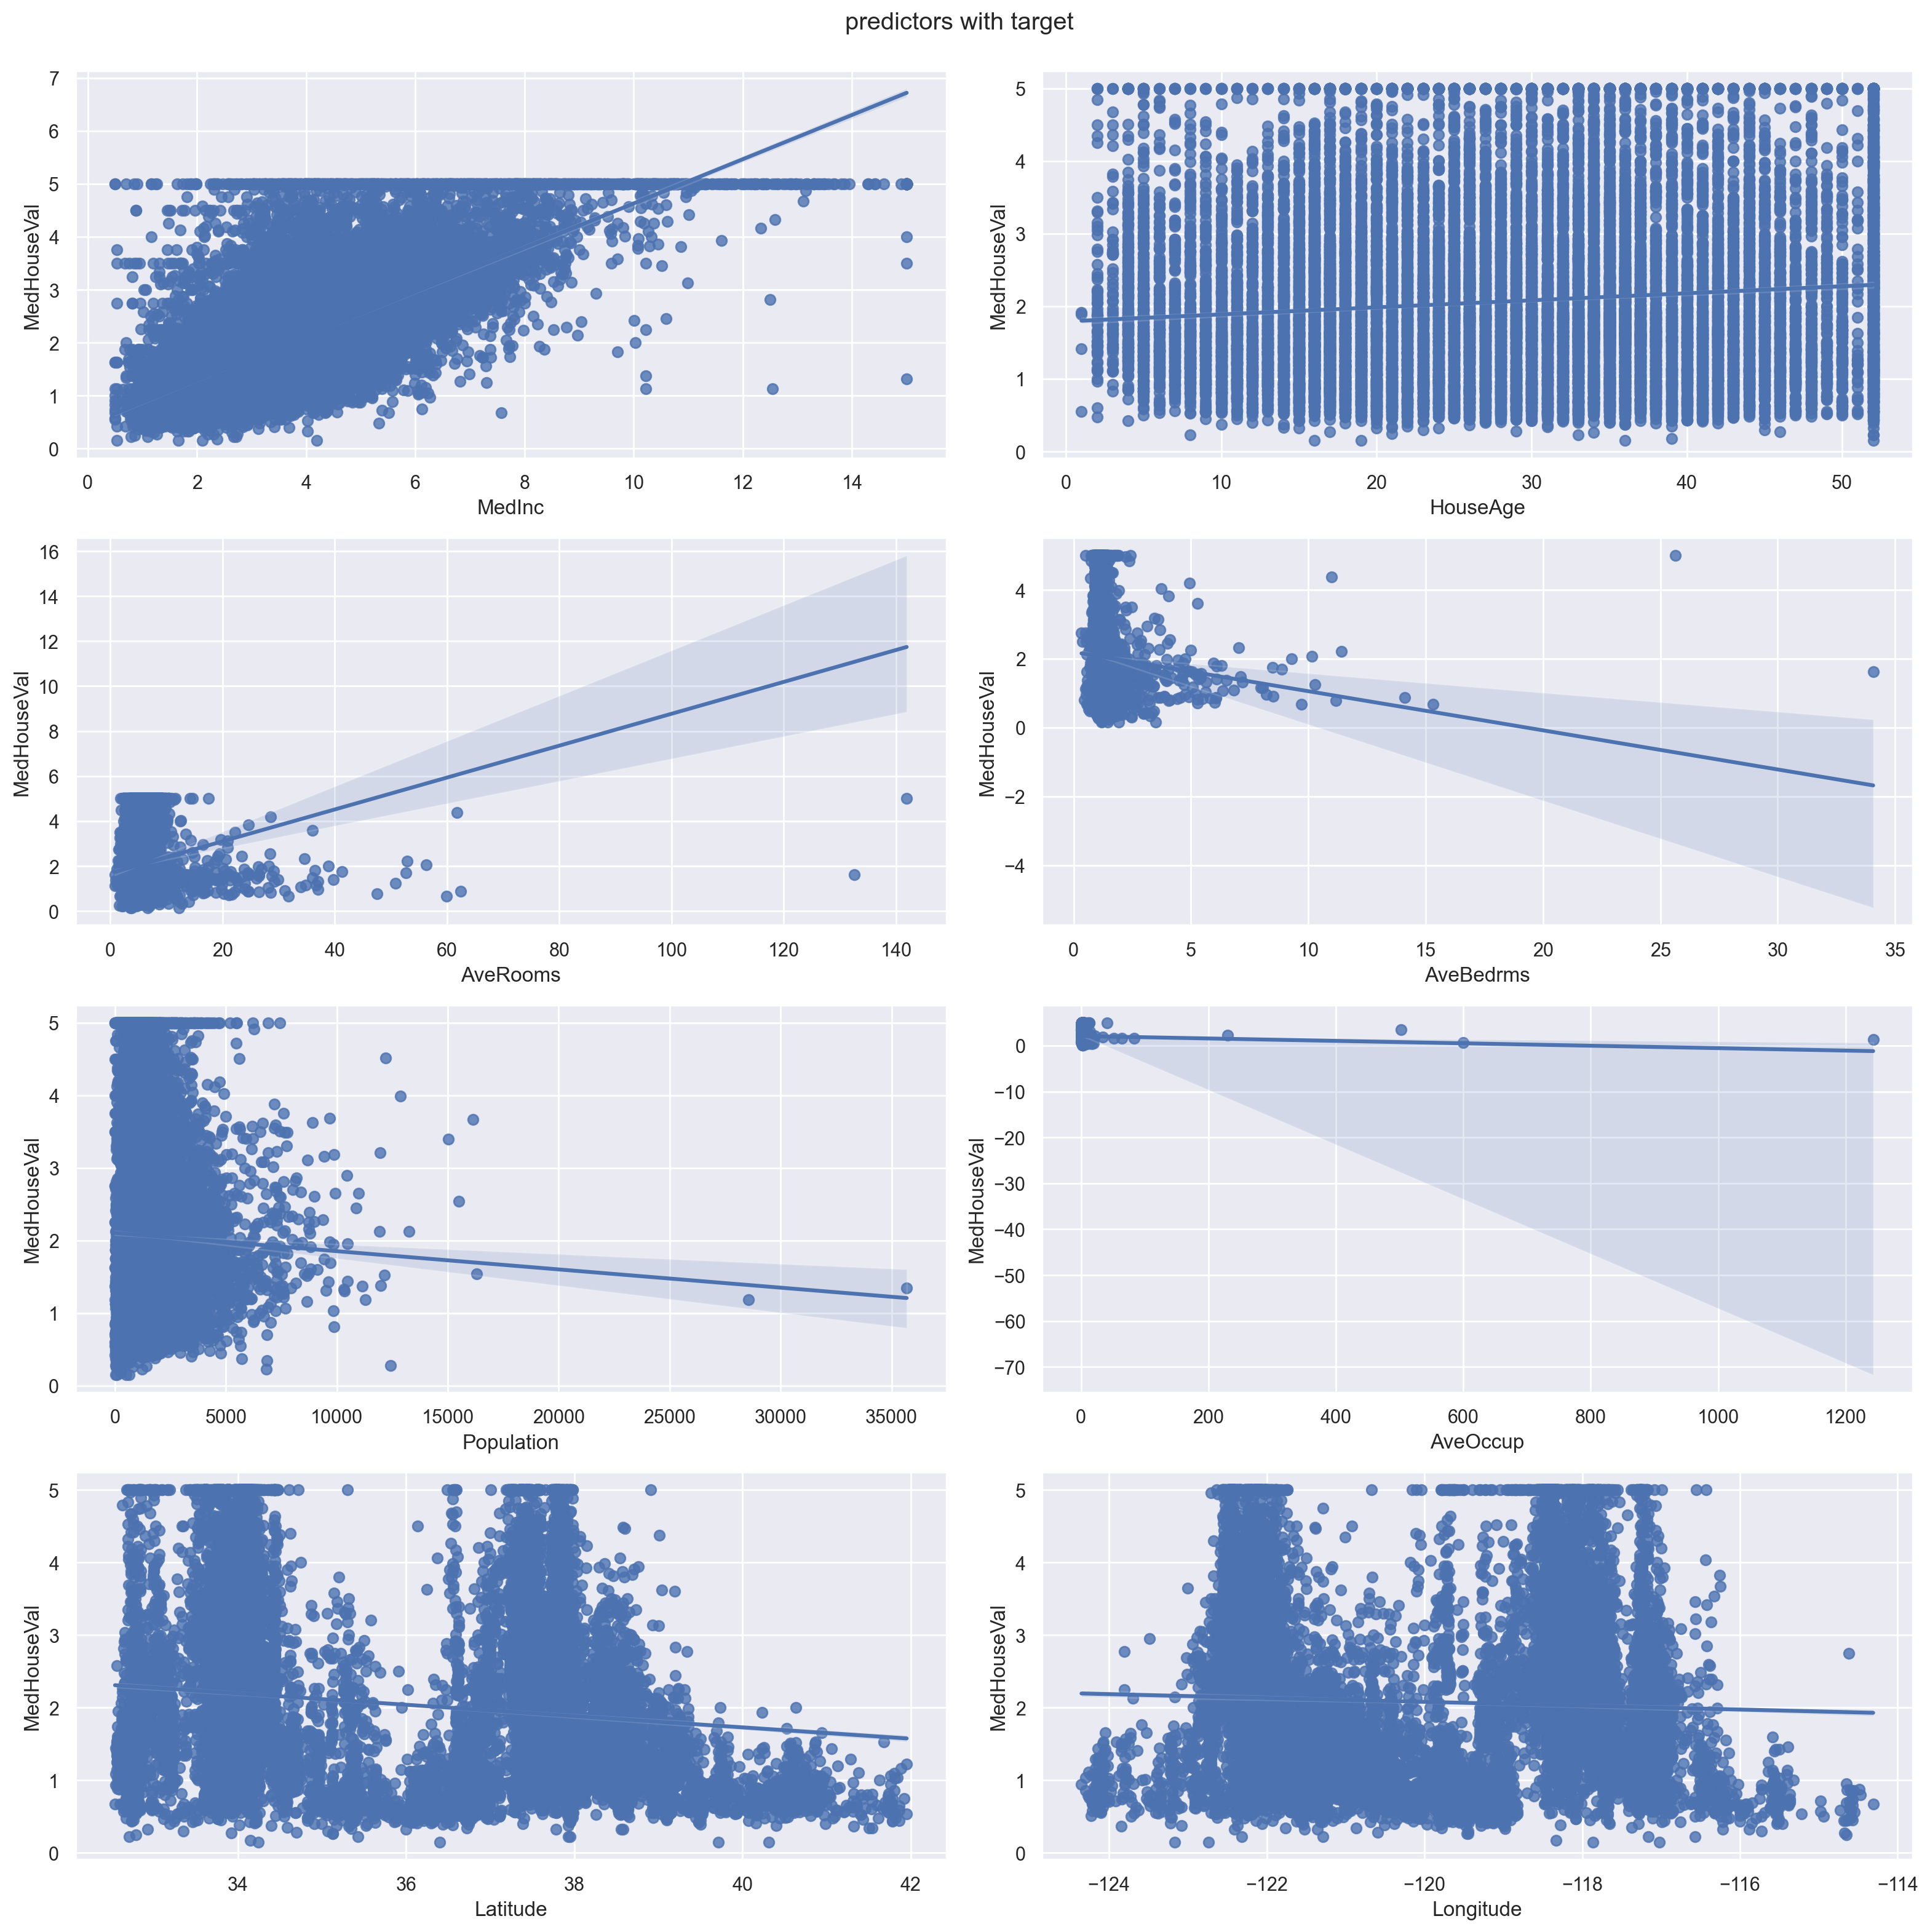

<Figure size 1170x827 with 0 Axes>

In [13]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
#TODO
fig, ax = plt.subplots(4, 2, figsize=(16,16))

for i,col in enumerate(X_df.columns[0:]):
     #random_df.plot(kind='scatter', x=col, y='MEDV', ax=ax[i])
     if i <= 1:
        sns.regplot(x=X_df[col], y=y_df["MedHouseVal"], ax=ax[0,i])
     elif i <= 3:
        sns.regplot(x=X_df[col], y=y_df["MedHouseVal"], ax=ax[1,i%2]) 
     elif i <= 5:
          sns.regplot(x=X_df[col], y=y_df["MedHouseVal"], ax=ax[2,i%2])  
     else:
        sns.regplot(x=X_df[col], y=y_df["MedHouseVal"], ax=ax[3,i%2])     

#ax[1,3].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('predictors with target')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()

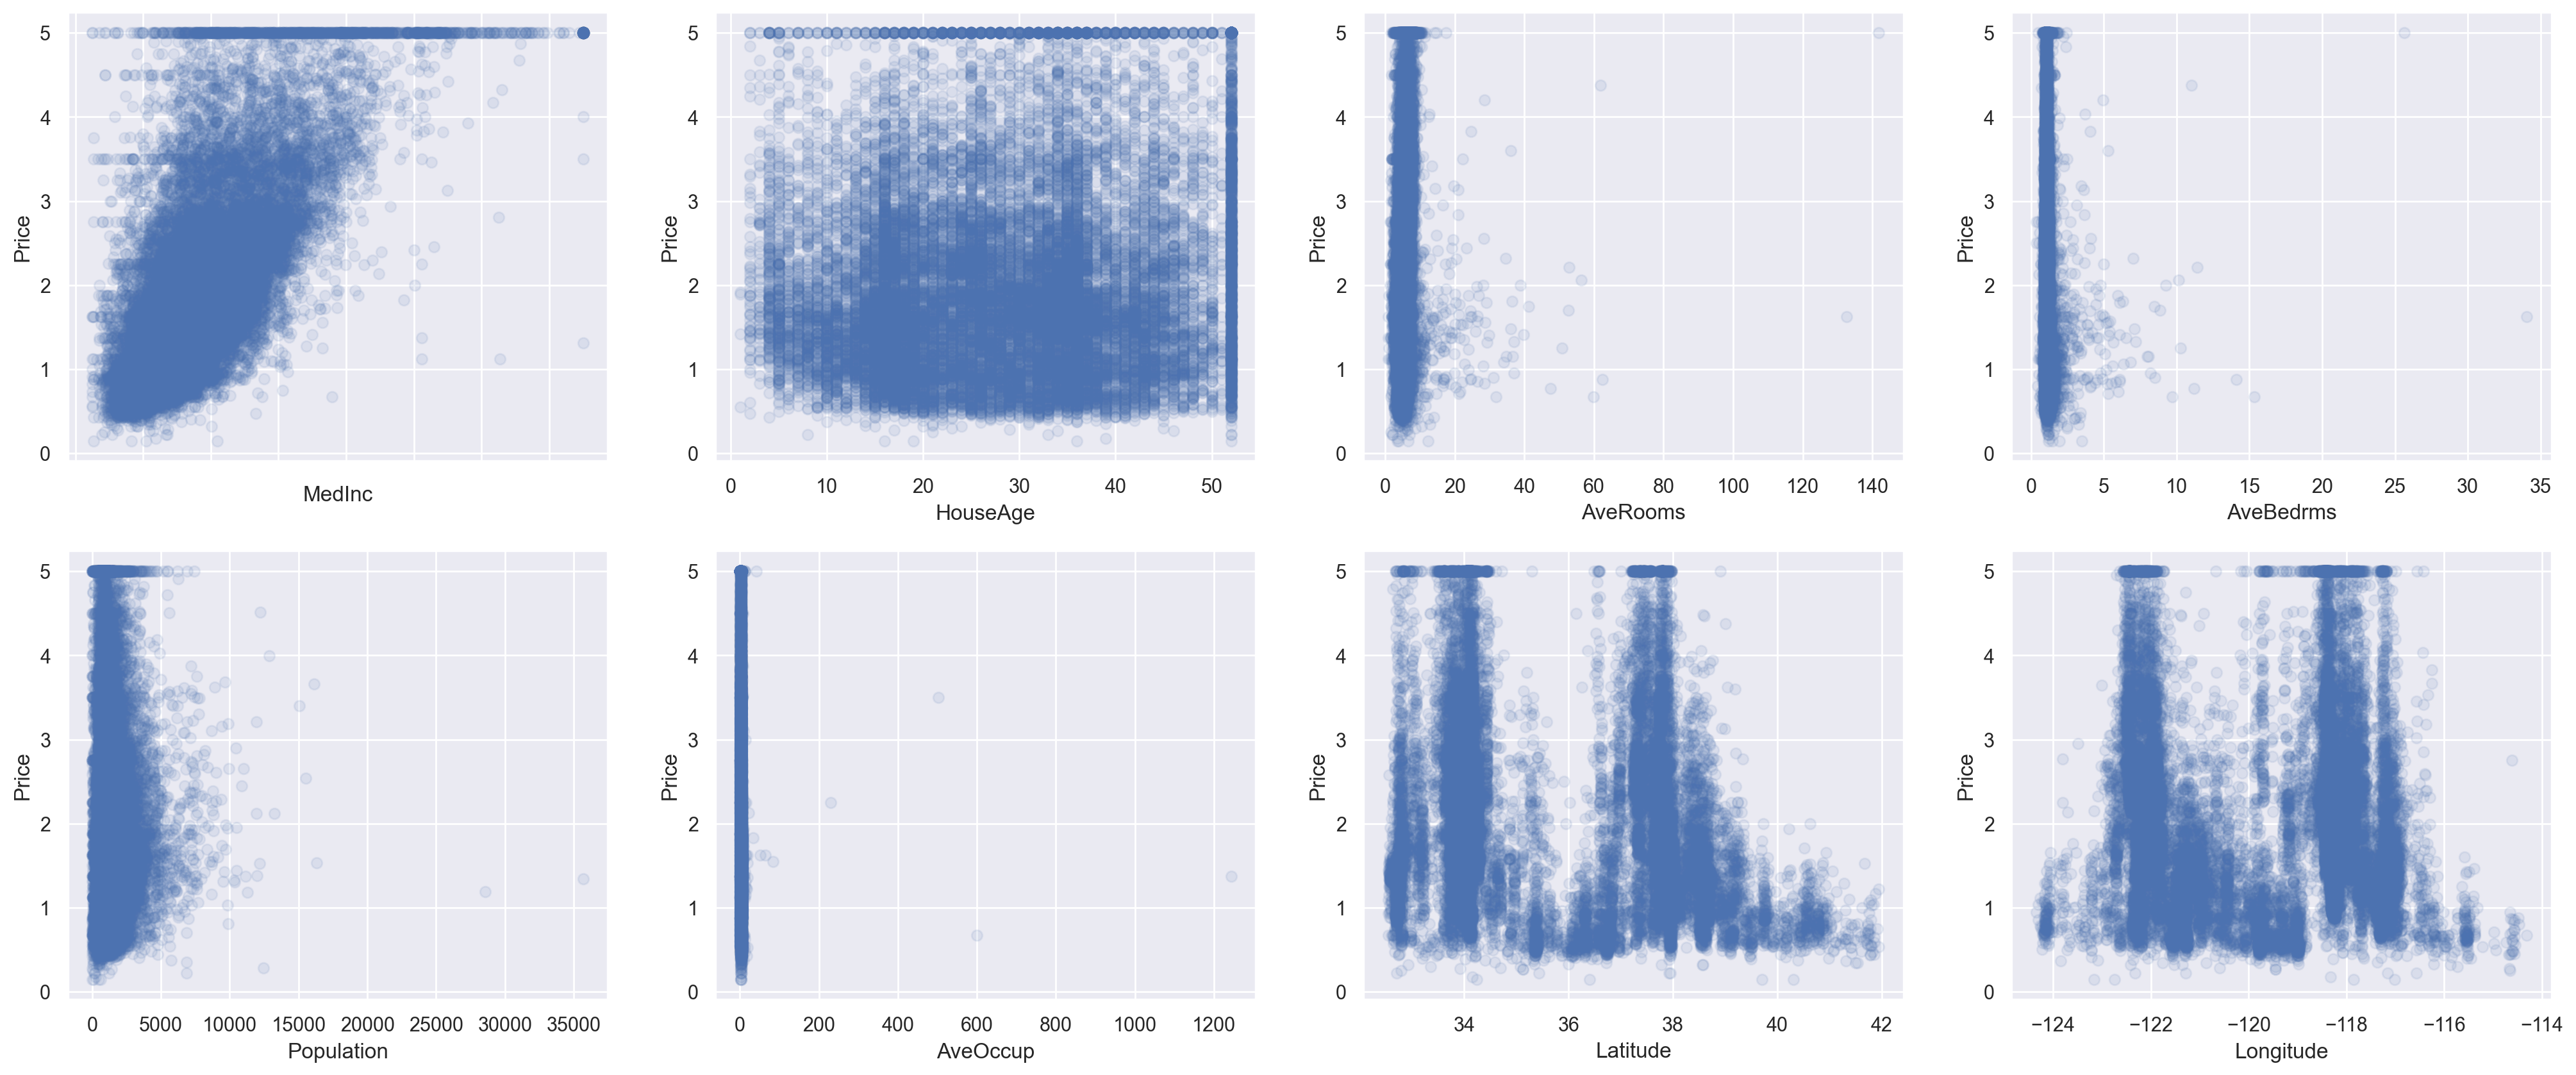

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(25,10))
axe = ax.ravel()
axe[0].set_xticklabels([])
axe[0].set_xlabel(' ')
for i, feature_name in zip(range(0,8), X_df.columns):
    axe[i].scatter(X_df[feature_name], y_df, alpha=0.1)
    axe[i].set_ylabel('Price')
    axe[i].set_xlabel(feature_name)

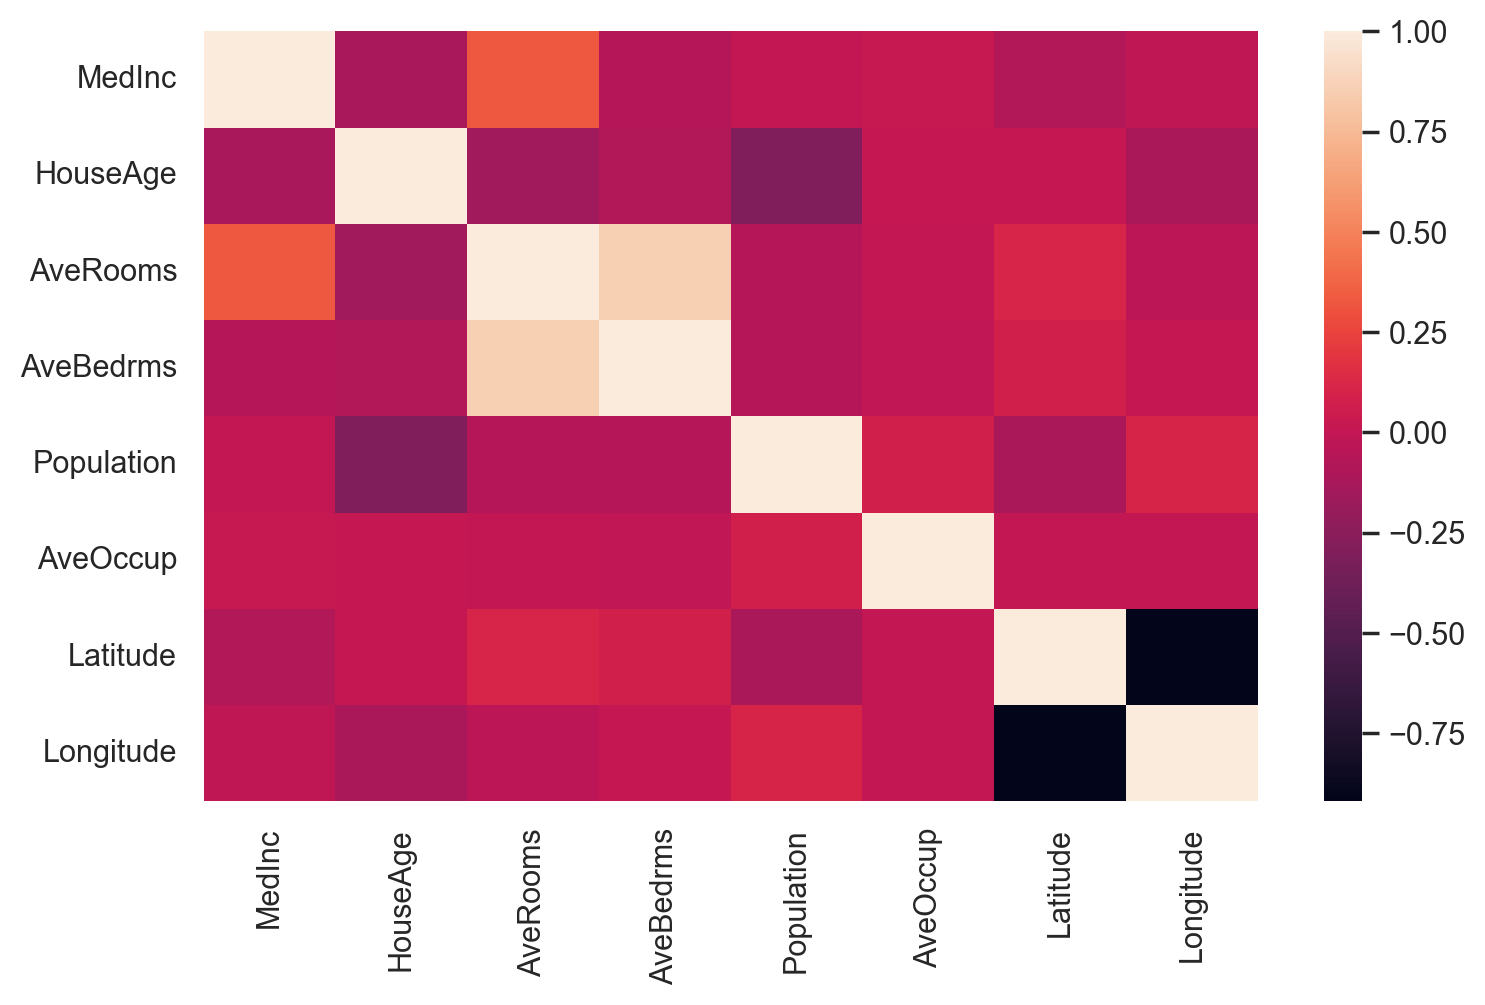

In [15]:
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

# Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
#TODO

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)

In [17]:
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (16512, 8) (16512,)
test data (4128, 8) (4128,)


# Pre-Processing

In [18]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
#TODO
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
quadratic =PolynomialFeatures(degree=2)
X_train_qr = quadratic.fit_transform(X_train_scaled) 
X_test_qr = quadratic.fit_transform(X_test_scaled)
#TODO

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [20]:
!conda install fracridge

Retrieving notices: ...working... done
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - fracridge

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [21]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

frac_reg = FracRidgeRegressorCV()

In [31]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
frac_reg.fit(X_train, y_train)
y_train_pred = frac_reg.predict(X_train)

# Make predictions on the test data
y_test_pred = frac_reg.predict(X_test)

chosen_penalty = frac_reg.best_frac_

# Calculate MSE and R-squared on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Chosen Fraction Penalty: {chosen_penalty}")
print(f"Test Set MSE: {test_mse}")
print(f"Test Set R-squared: {test_r2}")



Chosen Fraction Penalty: 0.9
Test Set MSE: 0.6016264508240636
Test Set R-squared: 0.5413351752990838


In [40]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
                                
#TODO
frac_reg1 = FracRidgeRegressorCV()

frac_reg1.fit(X_train_scaled, y_train)
y_train_scaled_pred = frac_reg.predict(X_train_scaled)

# Make predictions on the test data
y_test_scaled_pred = frac_reg1.predict(X_test_scaled)

chosen_penalty_scaled = frac_reg1.best_frac_

# Calculate MSE and R-squared on the test set
test_scaled_mse = mean_squared_error(y_test, y_test_scaled_pred)
test_scaled_r2 = r2_score(y_test, y_test_scaled_pred)

# Print the results
print(f"Chosen Fraction Penalty: {chosen_penalty_scaled}")
print(f"Test Set MSE: {test_scaled_mse}")
print(f"Test Set R-squared: {test_scaled_r2}")


Chosen Fraction Penalty: 1.0
Test Set MSE: 4.7540617112024925
Test Set R-squared: -2.62437668490026


In [38]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
frac_reg2 = FracRidgeRegressorCV()

frac_reg2.fit(X_train_qr, y_train)
y_train_qr_pred = frac_reg2.predict(X_train_qr)

# Make predictions on the test data
y_test_qr_pred = frac_reg2.predict(X_test_qr)

chosen_penalty_qr = frac_reg2.best_frac_

# Calculate MSE and R-squared on the test set
test_qr_mse = mean_squared_error(y_test, y_test_qr_pred)
test_qr_r2 = r2_score(y_test, y_test_qr_pred)

# Print the results
print(f"Chosen Fraction Penalty: {chosen_penalty_qr}")
print(f"Test Set MSE: {test_qr_mse}")
print(f"Test Set R-squared: {test_qr_r2}")

Chosen Fraction Penalty: 0.5
Test Set MSE: 0.5502820058625136
Test Set R-squared: 0.5804788845149905


In [25]:
from seaborn import regplot

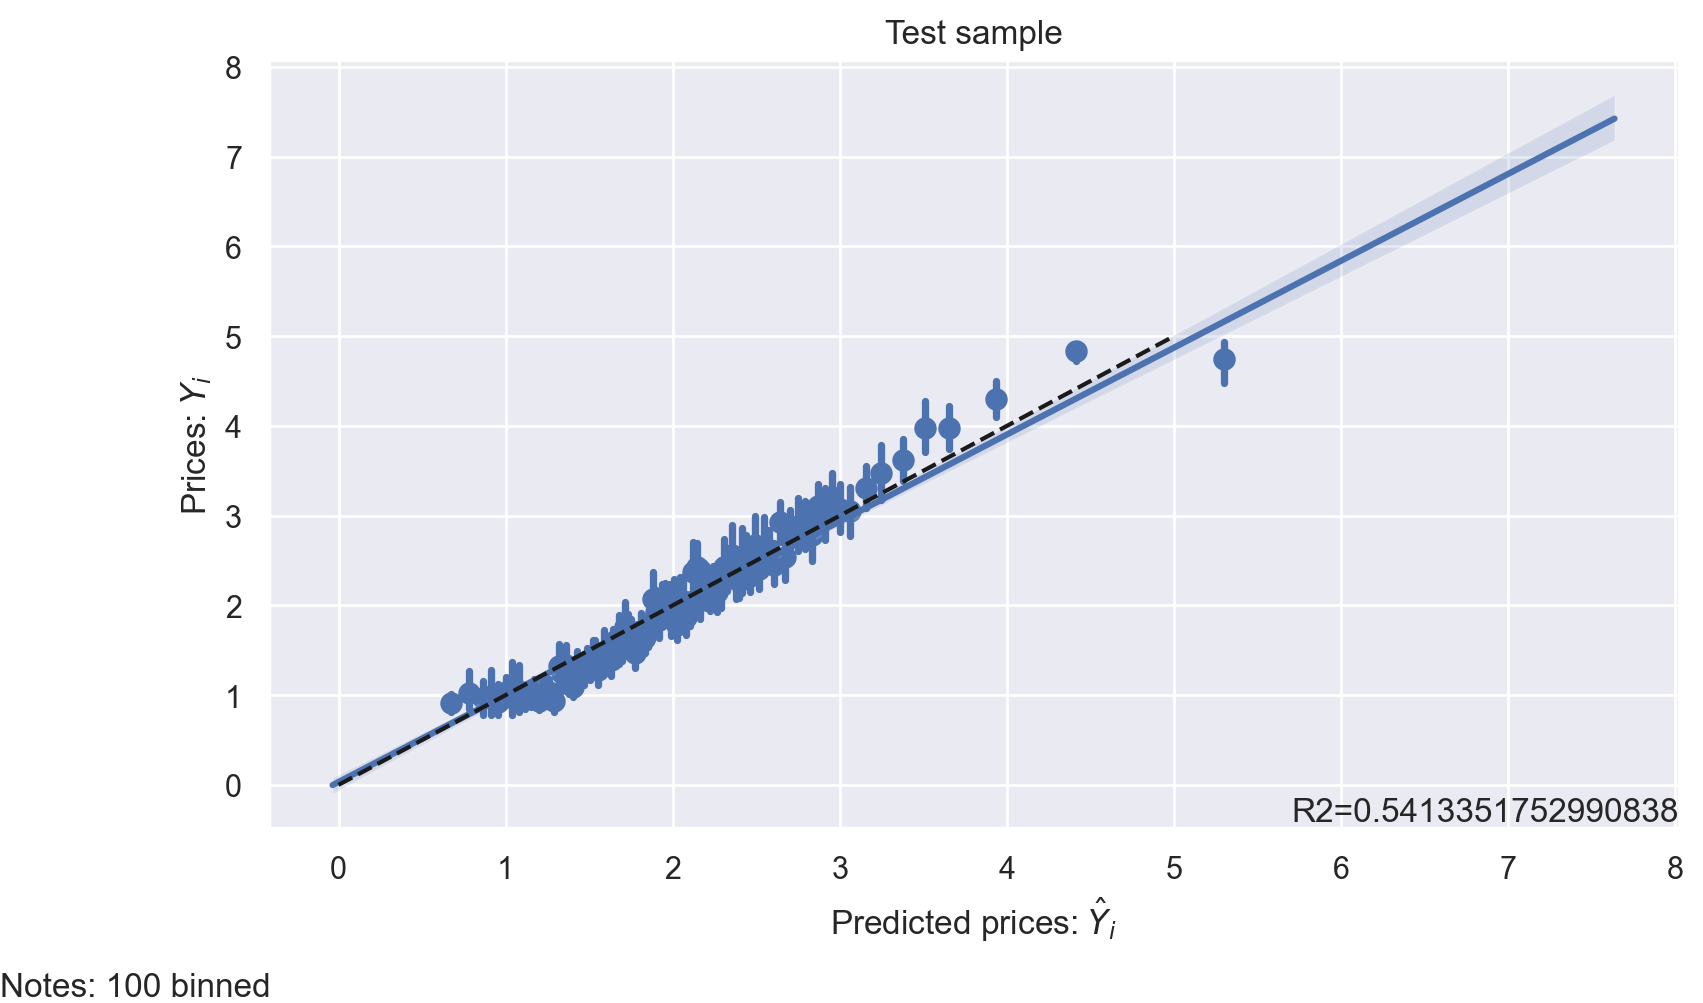

In [36]:
# report a binned regplot of the true outcome versus predictions in the test set
# Regplot

g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(test_r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

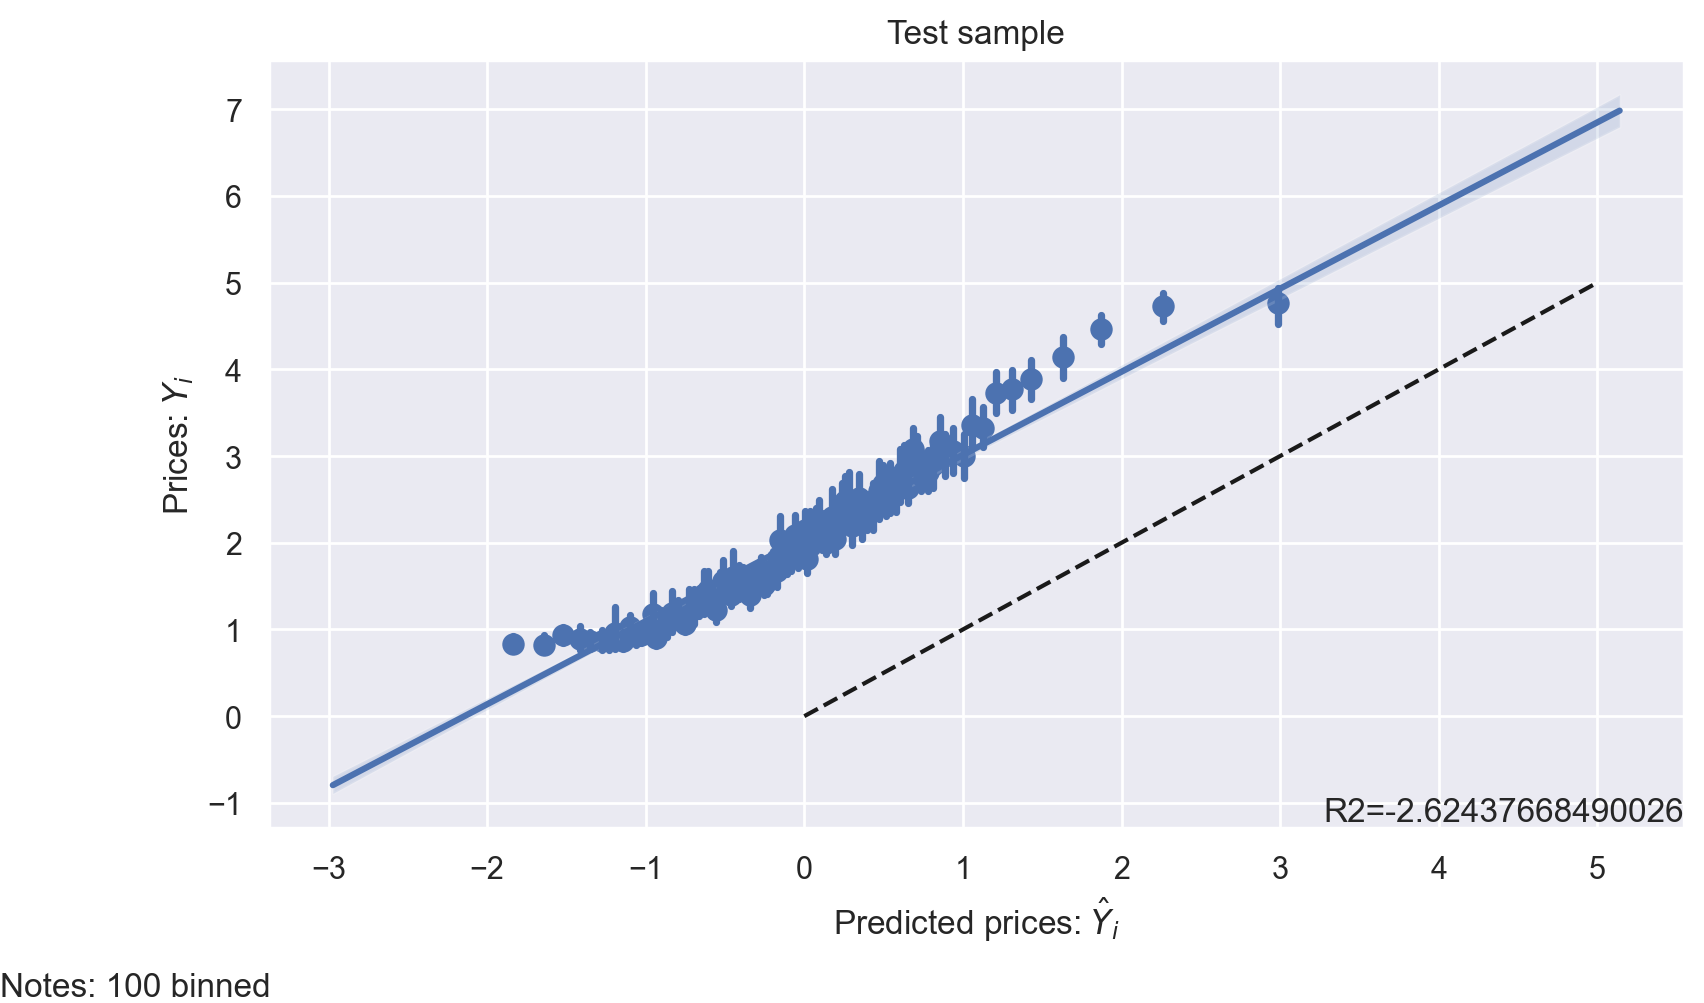

In [43]:
# Regplot

g=sns.regplot(x= y_test_scaled_pred, y=y_test , x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(test_scaled_r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

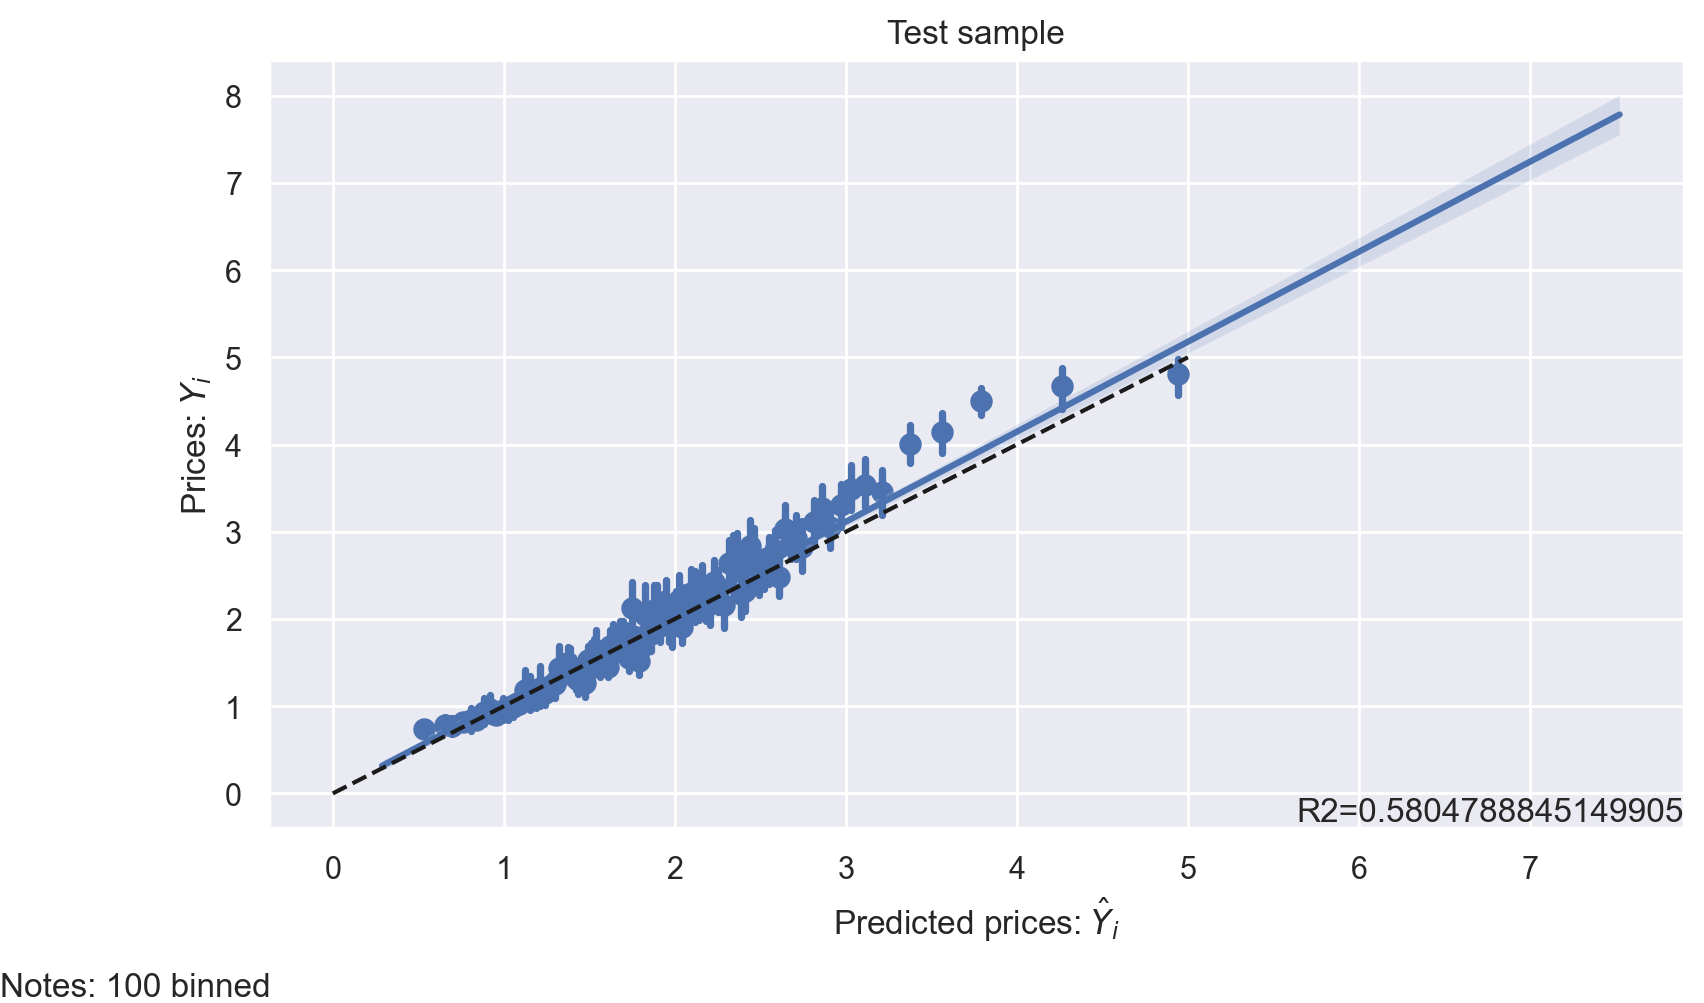

In [ ]:
# Regplot

g=sns.regplot(x= y_test_qr_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(test_qr_r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**

We see a slight improvement when we use the data with quadratic polynomial features. That is because it's based on the standardized predictors.  
I suppose that the prediction from the scaled data, is skewed to the left because we took out the mean.